In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/corrected CIC dataset/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/corrected CIC dataset/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/corrected CIC dataset/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/corrected CIC dataset/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/corrected CIC dataset/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/corrected CIC dataset/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/corrected CIC dataset/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/corrected CIC dataset/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [ ]:
data=[df1,df2,df3,df4,df5,df6,df7,df8]
df=pd.concat(data,ignore_index=True)

In [ ]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [ ]:
df['Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [ ]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)#to convert y to a 1D array.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
#The stratify=y argument ensures that the class distribution is preserved in the training and testing sets, which is important when dealing with imbalanced datasets.

In [ ]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={11:10000, 7:10000, 3:10000, 6:8000, 5:8000, 1:4000, 12:4000, 14:4000 , 9:1000, 13:1000, 8:1000}) # Create 1500 samples for the minority class "4"

In [ ]:
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
pd.Series(y_train).value_counts()

0     1818477
4      184858
10     127144
2      102421
3       10000
7       10000
11      10000
6        8000
5        8000
14       4000
12       4000
1        4000
9        1000
13       1000
8        1000
dtype: int64

Accuracy of DT: 0.9983325944230229
Precision of DT: 0.9983743676066462
Recall of DT: 0.9983325944230229
F1-score of DT: 0.9983491627825165
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.80      0.85      0.82       393
           2       1.00      1.00      1.00     25606
           3       0.99      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.98      0.99      1100
           6       0.99      1.00      0.99      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         7
          10       0.99      0.99      0.99     31786
          11       1.00      1.00      1.00      1179
          12       0.76      0.67      0.71       301
          13       0.43      0.75      0.55         4
          14       0.39      0.52      0.44       

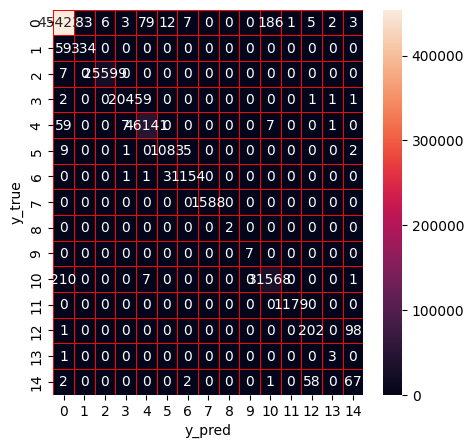

In [ ]:
#  Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.998191288865652
Precision of RF: 0.9981944559314196
Recall of RF: 0.998191288865652
F1-score of RF: 0.9981651366322458
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.74      0.54      0.63       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.99      1.00      2059
           4       0.99      1.00      1.00     46215
           5       0.99      0.99      0.99      1100
           6       1.00      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         7
          10       0.99      1.00      1.00     31786
          11       1.00      1.00      1.00      1179
          12       0.81      0.58      0.68       301
          13       1.00      0.50      0.67         4
          14       0.42      0.65      0.51       13

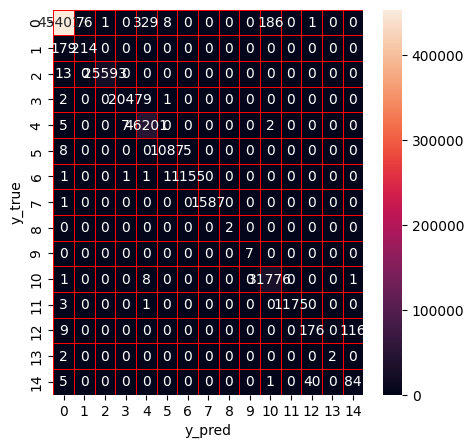

In [ ]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of XGBoost: 0.9982495774080675
Precision of XGBoost: 0.9983996408427505
Recall of XGBoost: 0.9982495774080675
F1-score of XGBoost: 0.9982548974255308
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.69      0.94      0.80       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.98      0.98      1100
           6       0.99      0.97      0.98      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         7
          10       0.99      1.00      1.00     31786
          11       1.00      1.00      1.00      1179
          12       0.85      0.41      0.55       301
          13       0.40      0.50      0.44         4
          14       0.43      0

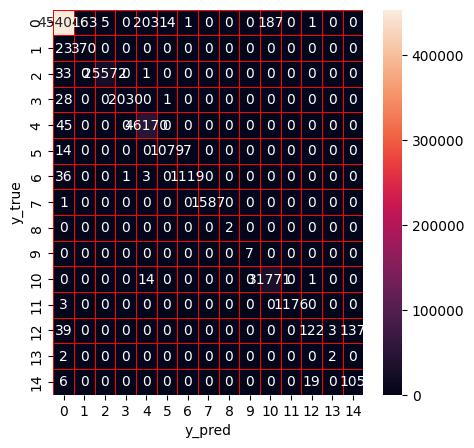

In [ ]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Accuracy of ET: 0.9983043333115488
Precision of ET: 0.9983286286060683
Recall of ET: 0.9983043333115488
F1-score of ET: 0.9983103371005541
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.81      0.79      0.80       393
           2       1.00      1.00      1.00     25606
           3       0.99      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.99      0.99      1100
           6       0.99      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.99      0.99      0.99     31786
          11       1.00      0.99      1.00      1179
          12       0.76      0.64      0.70       301
          13       0.40      0.50      0.44         4
          14       0.40      0.53      0.45       

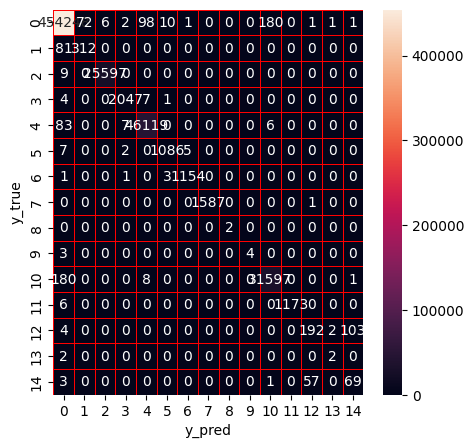

In [ ]:
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

In [ ]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,2,2,2,2
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [ ]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [ ]:
stk = xgb.XGBClassifier().fit(x_train, y_train)

Accuracy of Stacking: 0.9982478110886004
Precision of Stacking: 0.9982695527857669
Recall of Stacking: 0.9982478110886004
F1-score of Stacking: 0.998248811780316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.86      0.76      0.81       393
           2       1.00      1.00      1.00     25606
           3       0.99      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.99      0.99      1100
           6       0.99      1.00      0.99      1159
           7       0.95      1.00      0.97      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.99      0.99      0.99     31786
          11       1.00      0.99      1.00      1179
          12       0.77      0.64      0.70       301
          13       1.00      0.50      0.67         4
          14       0.40    

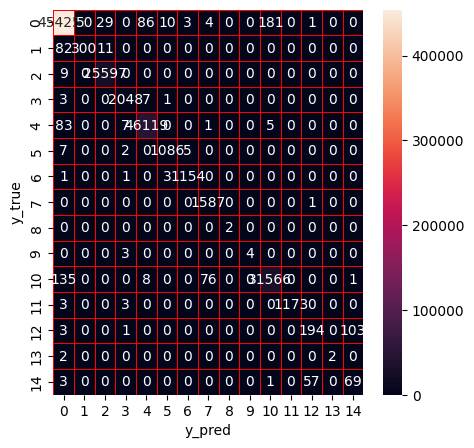

In [ ]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [ ]:
# calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [ ]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

Features sorted by their score:
[(0.1052, 'Bwd Packet Length Std'), (0.0762, 'Average Packet Size'), (0.0591, 'Destination Port'), (0.0587, 'Packet Length Variance'), (0.0487, 'Packet Length Std'), (0.0416, 'Fwd Packet Length Max'), (0.0356, 'Fwd IAT Std'), (0.0354, 'PSH Flag Count'), (0.034, 'Bwd Packet Length Mean'), (0.0328, 'Bwd Packets/s'), (0.0316, 'Bwd Packet Length Min'), (0.025, 'Init_Win_bytes_forward'), (0.0232, 'Avg Bwd Segment Size'), (0.0203, 'act_data_pkt_fwd'), (0.0181, 'Total Fwd Packets'), (0.0174, 'Fwd Packets/s'), (0.0167, 'Bwd Packet Length Max'), (0.0158, 'ACK Flag Count'), (0.0152, 'Packet Length Mean'), (0.0142, 'Flow IAT Max'), (0.0141, 'Max Packet Length'), (0.0139, 'Init_Win_bytes_backward'), (0.0129, 'Fwd IAT Max'), (0.0127, 'Idle Min'), (0.0126, 'Flow IAT Mean'), (0.0122, 'Total Length of Fwd Packets'), (0.0108, 'Fwd Packet Length Mean'), (0.0097, 'Avg Fwd Segment Size'), (0.0095, 'Subflow Fwd Packets'), (0.0094, 'Idle Max'), (0.0092, 'Flow Duration'), (0.0

In [ ]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)

In [ ]:
len(f_list)

78

In [ ]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break

In [ ]:
len(fs)

37

In [ ]:
X_fs = df[fs].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [ ]:
X_train.shape

(2264594, 37)

In [ ]:
pd.Series(y_train).value_counts()

0     1818477
4      184858
10     127144
2      102421
3        8234
7        6350
11       4718
6        4637
5        4399
1        1573
12       1206
14        522
9          29
13         17
8           9
dtype: int64

Accuracy of DT: 0.9983643881734314
Precision of DT: 0.9983704521955072
Recall of DT: 0.9983643881734314
F1-score of DT: 0.998366881093946
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.80      0.84      0.82       393
           2       1.00      1.00      1.00     25606
           3       0.99      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.98      0.98      0.98      1100
           6       0.99      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         7
          10       0.99      0.99      0.99     31786
          11       1.00      1.00      1.00      1179
          12       0.75      0.77      0.76       301
          13       0.33      0.25      0.29         4
          14       0.43      0.42      0.42       1

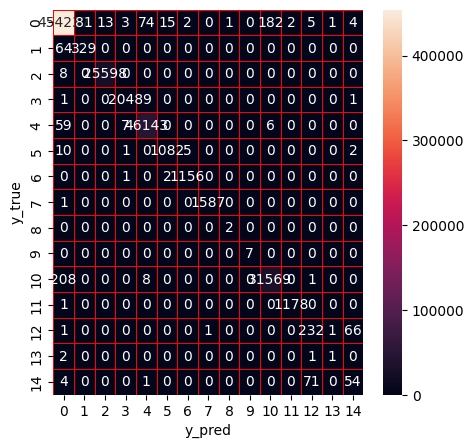

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.9987105867889902
Precision of RF: 0.9986771315911235
Recall of RF: 0.9987105867889902
F1-score of RF: 0.9986855852630762
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.86      0.72      0.78       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.99      1.00      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.99      0.99      1100
           6       1.00      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         7
          10       0.99      1.00      1.00     31786
          11       1.00      1.00      1.00      1179
          12       0.74      0.79      0.77       301
          13       1.00      0.25      0.40         4
          14       0.42      0.33      0.37       

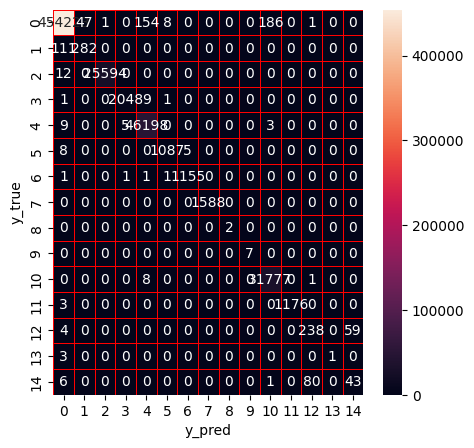

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.9982972680336801
Precision of ET: 0.9982635711773066
Recall of ET: 0.9982972680336801
F1-score of ET: 0.9982749666667605
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.83      0.74      0.78       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.99      0.99      1100
           6       0.99      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.99      0.99      0.99     31786
          11       1.00      0.99      1.00      1179
          12       0.75      0.80      0.77       301
          13       1.00      0.50      0.67         4
          14       0.46      0.35      0.40       

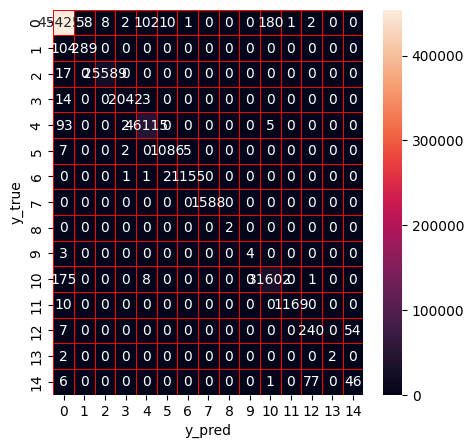

In [ ]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.9981294676843022
Precision of XGBoost: 0.9981376958445475
Recall of XGBoost: 0.9981294676843022
F1-score of XGBoost: 0.9979899357319909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.96      0.57      0.72       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.97      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.98      0.98      1100
           6       0.99      0.99      0.99      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         7
          10       0.99      1.00      1.00     31786
          11       1.00      1.00      1.00      1179
          12       0.68      0.83      0.75       301
          13       0.00      0.00      0.00         4
          14       1.00      0

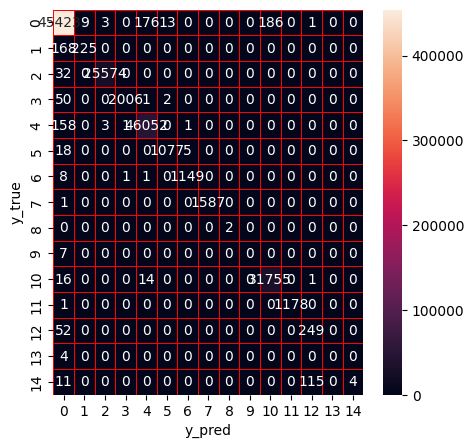

In [ ]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [ ]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,2,2,2,2
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [ ]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.9984562367857225
Precision of Stacking: 0.998421577259027
Recall of Stacking: 0.9984562367857225
F1-score of Stacking: 0.9984277271115837
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.89      0.72      0.79       393
           2       1.00      1.00      1.00     25606
           3       0.99      1.00      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.98      0.99      1100
           6       0.99      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.99      1.00      0.99     31786
          11       1.00      1.00      1.00      1179
          12       0.75      0.80      0.77       301
          13       1.00      0.25      0.40         4
          14       0.46    

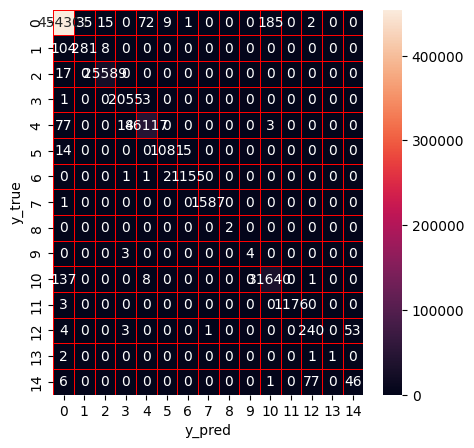

In [ ]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(dt, open('/content/model_saved', 'wb'))

In [ ]:
pickle.dump(xg, open('/content/model_savedxg', 'wb'))

In [ ]:
pickle.dump(stk, open('/content/model_savedstk', 'wb'))